# Molecule Fragmentation

This notebook is to understand how to decompose small molecules in to their building blocks using various algorithms.

This could prove useful in various tasks such as R-group replacement, scaffold hopping and molecule optimisation.

In [5]:
import os
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem, BRICS, Descriptors, RDConfig, Draw

## Method 1

Consider a sample molecule:

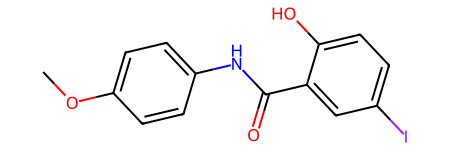

In [6]:
mol = Chem.MolFromSmiles('COc1ccc(NC(=O)c2cc(I)ccc2O)cc1')
mol

In [8]:
# BRICS decomposition. Returns a set of fragments.

frags = BRICS.BRICSDecompose(mol)
frags

{'[1*]C([6*])=O',
 '[16*]c1cc(I)ccc1O',
 '[16*]c1ccc([16*])cc1',
 '[3*]OC',
 '[5*]N[5*]'}

#### Build a fragment library by decomposing a list of molecules

In [12]:
all_frags = set()



## Method 2

In [10]:
# Set up the fragmenter:
from rdkit.Chem import FragmentCatalog

fName = os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
fparams = FragmentCatalog.FragCatParams(1,6,fName)

# Get the number of functional groups:
fparams.GetNumFuncGroups()
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()

In [ ]:
# Fragment the following molecules

m = Chem.MolFromSmiles('OCC=CC(=O)O')
print(fcgen.AddFragsFromMol(m,fcat))

3


In [ ]:
#Check what the fragments look like:

print(fcat.GetEntryDescription(0))
print(fcat.GetEntryDescription(1))
print(fcat.GetEntryDescription(2))

C<-O>C
C=C<-C(=O)O>
C<-C(=O)O>=CC<-O>


Notice that the entry descriptions include pieces in angular brackets (e.g. between ‘<’ and ‘>’). These describe the functional groups attached to the fragment. 

For example, in the above example, the catalog entry 0 corresponds to an ethyl fragment
with an alcohol attached to one of the carbons and entry 1 is an ethylene with a carboxylic acid on one carbon

This method generates too many and irrelevant fragments. 